MACHINE LEARNING


In [ ]:
from google.colab import drive
import pandas as pd # Dataframes' management
import numpy as np # Arrays' management
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import resample
import matplotlib.dates as mdates

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/WEB ANALYTICS FINAL PROJECT/df_sin_outliers.csv')

In [ ]:
scaler = StandardScaler()
df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

# Identify the class with the minimum instances
minority_class = df['Category'].value_counts().idxmin()

# Separate majority and minority classes
df_majority = df[df['Category'] != minority_class]
df_minority = df[df['Category'] == minority_class]

# Oversample the minority class to match the number of instances in the majority class
df_minority_oversampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine the oversampled minority class with the majority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the dataset
df_oversampled = df_oversampled.sample(frac=1, random_state=42)



# Assuming 'Category' is the target variable
X = df_oversampled.drop(['Category', 'Track_ID', 'Track'], axis=1)
y = df_oversampled['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_columns = ['key', 'mode']

# Create a column transformer to handle numerical and categorical features separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64']).columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Initialize the Random Forest model with your optimal hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=7,
    min_samples_leaf=1
)

# Create a pipeline with the preprocessor and the Random Forest model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf * 100)



Random Forest Accuracy: 60.32608695652174


In [ ]:
!pip install spotipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import webbrowser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 5.3 MB/s eta 0:00:00


In [ ]:
SPOTIPY_CLIENT_ID = '90093b8d6a1f40f6b40fbeef6a3bb590'
SPOTIPY_CLIENT_SECRET = '2da72bded8fc47cfb13903ab1f6e12d8'
SPOTIPY_REDIRECT_URI = 'http://localhost:8888/callback'

# Set up authorization and obtain access token
sp_oauth = SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID,
                        client_secret=SPOTIPY_CLIENT_SECRET,
                        redirect_uri=SPOTIPY_REDIRECT_URI,
                        scope="user-library-read",
                        open_browser=False)

# Get the authorization URL
auth_url = sp_oauth.get_authorize_url()
print(f"Por favor, visite esta URL para autorizar la aplicación: {auth_url}")

Por favor, visite esta URL para autorizar la aplicación: https://accounts.spotify.com/authorize?client_id=90093b8d6a1f40f6b40fbeef6a3bb590&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fcallback&scope=user-library-read


In [ ]:
# After user grants permission, capture the authorization code and exchange it for an access token
code = input("Enter the authorization code: ")
token_info = sp_oauth.get_access_token(code)
#code = AQCZVxpWHovDFT5zEFSUYrk6mt3O01shbRPaihVaXWnMmYd_-6Qubbtu5Y2g7Pgm6hCIrmeEFXqWBmPTGMqWkCxh2Z_VxIF11OnSB_UO29_r-PIEARHsWIGok0La5myVgemwwGMekgTrcTo40ieJ3MulmRvEeyV2PiGKRRiWClIUzMYNtj5vuPt5OQUPtdn50uWSIRo
# Comprueba si el token de acceso es válido
if token_info:
    access_token = token_info['access_token']

    # Crea una instancia de la clase Spotipy
    sp = spotipy.Spotify(auth=access_token)

    # Obtiene información del usuario
    user_info = sp.current_user()
    print("Información del Usuario:")
    print(f"Nombre de usuario: {user_info['display_name']}")
    print(f"ID de usuario: {user_info['id']}")
else:
    print("No se pudo obtener el token de acceso.")

Enter the authorization code: AQDSLOmtlNeobAX4_-Xk6uiTiRV0bnOXT16-Y6H2chYhGFJM3Om5NBQkJVWxozIk8x87pu8rb073bhoeDw38fCssj0Nz-ml3pdpDIgsmSYtvxWGjG8tvtJNg0-XScVrolQY4CO9oVFlbYdWeXapOmsbulYZuCQz_ljqnOGrPIuJ3YpSTROU7ghGnedqDh30KEWmej5I


<ipython-input-6-82f44600ad38>:3: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = sp_oauth.get_access_token(code)


Información del Usuario:
Nombre de usuario: tatis
ID de usuario: tatis.ach


In [ ]:
def playlists_tracks(playlist):
  tracks = []
  tracks_name = []
  for track_info in playlist:
    name = track_info['track']['name']
    track_id = track_info['track']['id']
    #print('name: ', name, '-> id: ', track_id)
    tracks.append(track_id)
    tracks_name.append([track_id, name])

  return tracks, tracks_name

def albums_tracks(playlist):
  tracks = []
  tracks_name = []

  for track_info in playlist:
    name = track_info['name']
    track_id = track_info['id']
    #print('name: ', name, '-> id: ', track_id)
    tracks.append(track_id)
    tracks_name.append([track_id, name])

  return tracks, tracks_name


#To get a dataframe of the track_id, track and audiofeatures
def audio_features_df(tracks, tracks_name):
  audio_features = sp.audio_features(tracks=tracks)
  audio_ft = []
  for i in range(len(audio_features)):
      danceability = audio_features[i]['danceability']
      energy = audio_features[i]['energy']
      key = audio_features[i]['key']
      loudness = audio_features[i]['loudness']
      mode = audio_features[i]['mode']
      speechiness = audio_features[i]['speechiness']
      acousticness = audio_features[i]['acousticness']
      instrumentalness = audio_features[i]['instrumentalness']
      liveness = audio_features[i]['liveness']
      valence = audio_features[i]['valence']
      tempo = audio_features[i]['tempo']

      audio_ft.append([danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo])

  columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
  df_user_playlists = pd.DataFrame(audio_ft, columns=columns)
  df_user_playlists.insert(0, 'Track_ID', [item[0] for item in tracks_name])
  df_user_playlists.insert(1, 'Track', [item[1] for item in tracks_name])

  return df_user_playlists

In [ ]:
def pie_category(df_user_playlists):
    X_new = df_user_playlists.drop(['Track_ID', 'Track'], axis=1)

    y_pred_new = rf_pipeline.predict(X_new)

    # Agregar las predicciones al DataFrame original
    df_user_playlists['category'] = y_pred_new

    # Visualizar las proporciones de las categorías con un pie chart
    category_counts = df_user_playlists['category'].value_counts()
    labels = category_counts.index
    sizes = category_counts.values

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Distribución de Categorías')

    # Return the figure and axis
    return fig, ax, df_user_playlists

def mostrar_canciones_por_categoria(categoria):
    songs_in_category = df_user_playlists[df_user_playlists['category'] == categoria][['Track']]
    print('Songs in category ', categoria, ': ')
    return songs_in_category

**1. DESCUBRE LA ESENCIA DE TUS PLAYLISTS:**



DISCOVER THE ESSENCE OF YOUR PLAYLISTS.
Select what you want to analyze:
1. One of your playlists
2. One of your saved albums
3. Your saved tracks
4. My favourite artist
Enter the corresponding number (1, 2, 3, or 4): 4
You selected: Explore your favourite artist.
Which artist do you want to explore? Luciano Pavarotti
0Y8KmFkKOgJybpVobn1onU
Instrumental    40
Name: category, dtype: int64


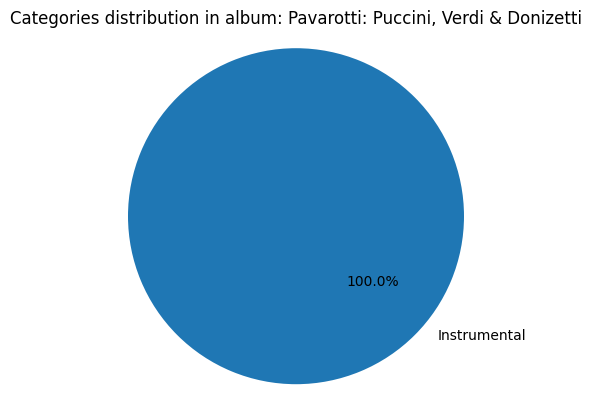

Instrumental    18
Name: category, dtype: int64


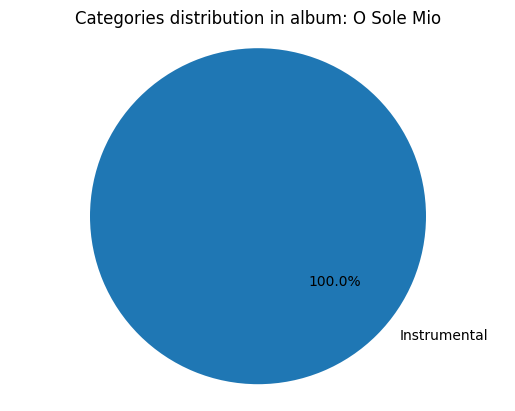

Instrumental    29
Name: category, dtype: int64


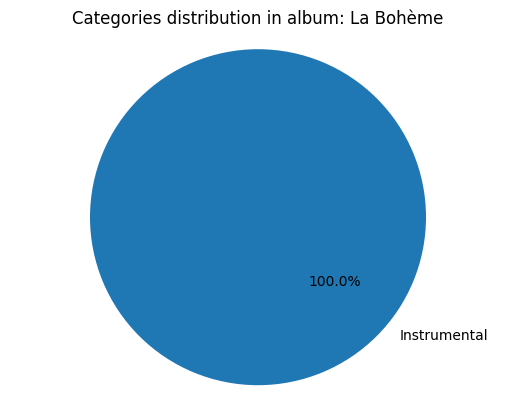

Instrumental    12
Name: category, dtype: int64


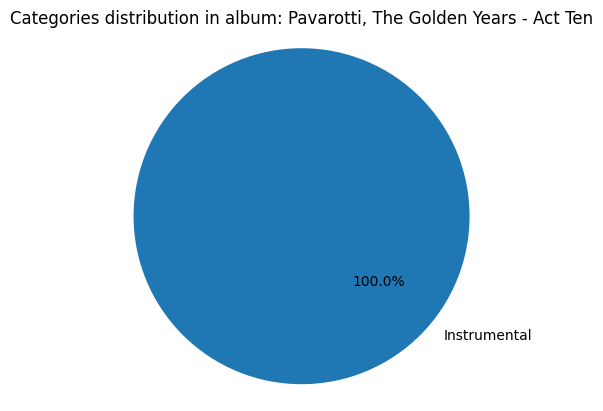

Instrumental    16
Name: category, dtype: int64


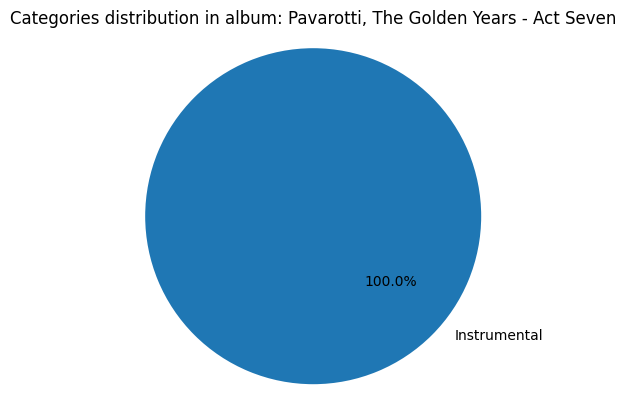

Instrumental    18
Name: category, dtype: int64


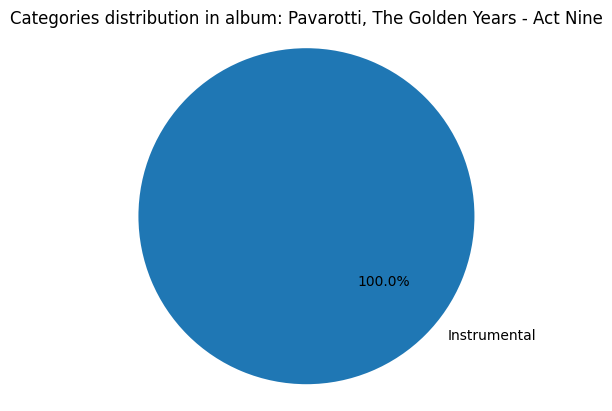

Instrumental    18
Name: category, dtype: int64


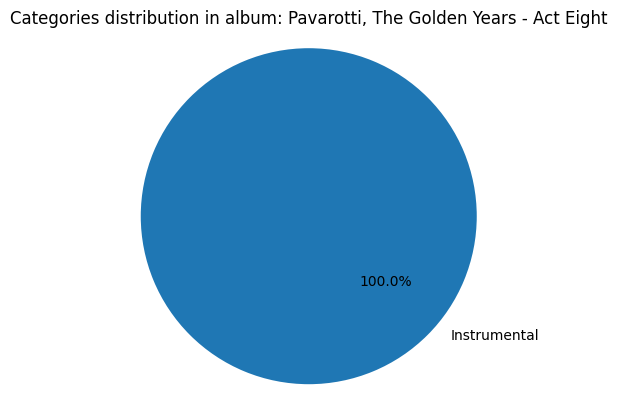

Instrumental    19
Name: category, dtype: int64


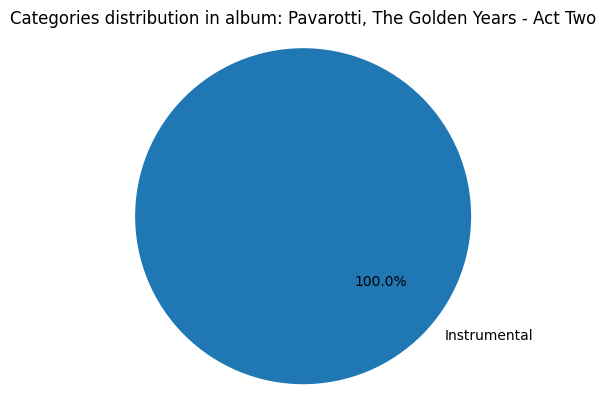

Instrumental    19
Name: category, dtype: int64


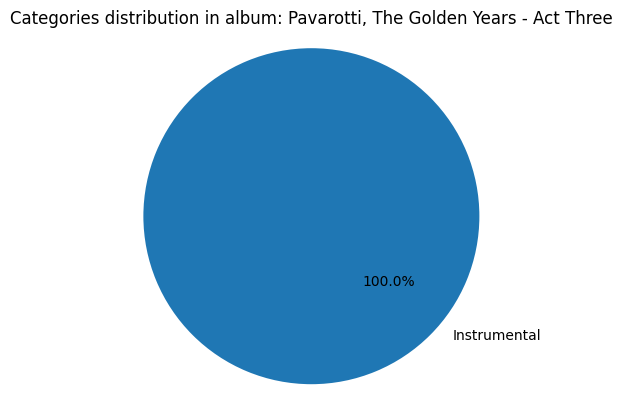

Instrumental    17
Name: category, dtype: int64


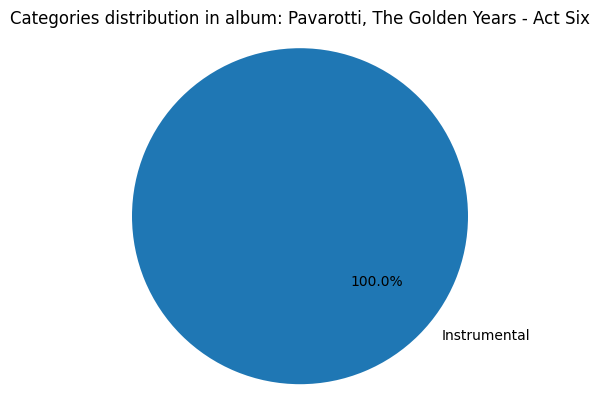

Instrumental    19
Name: category, dtype: int64


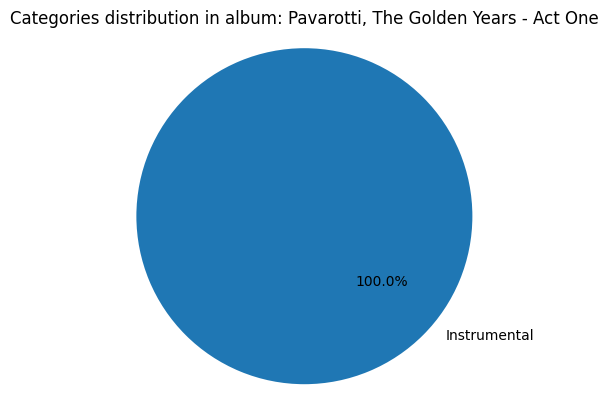

Instrumental    19
Name: category, dtype: int64


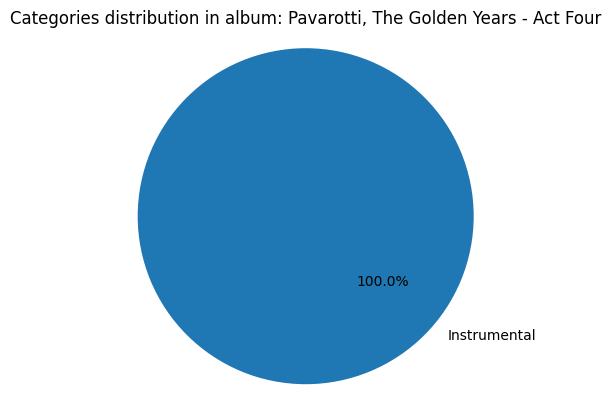

Instrumental    19
Name: category, dtype: int64


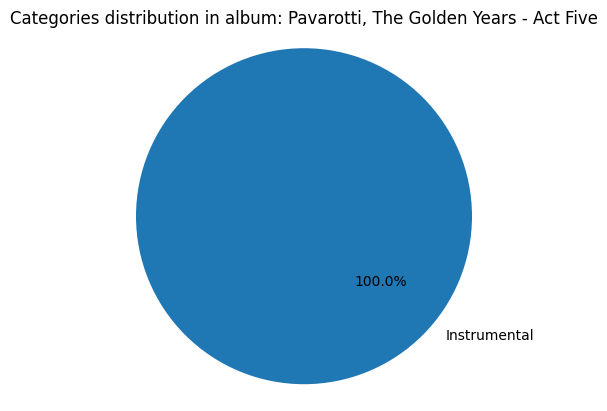

Instrumental    47
Name: category, dtype: int64


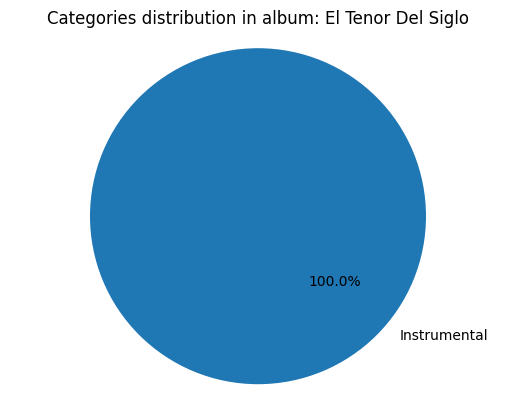

Instrumental    50
Name: category, dtype: int64


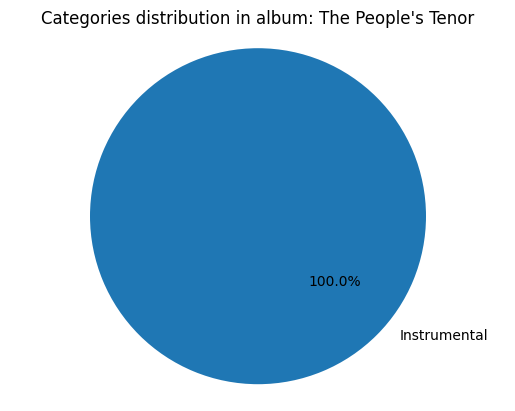

Instrumental    34
Name: category, dtype: int64


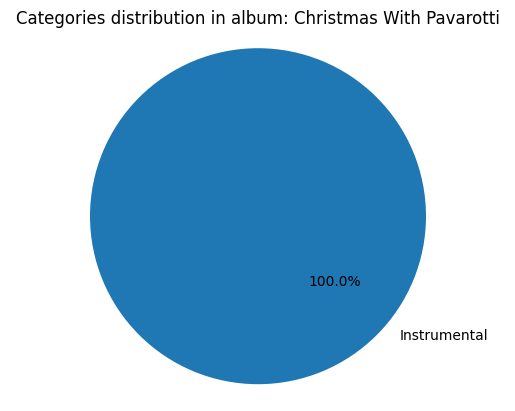

Instrumental    27
Name: category, dtype: int64


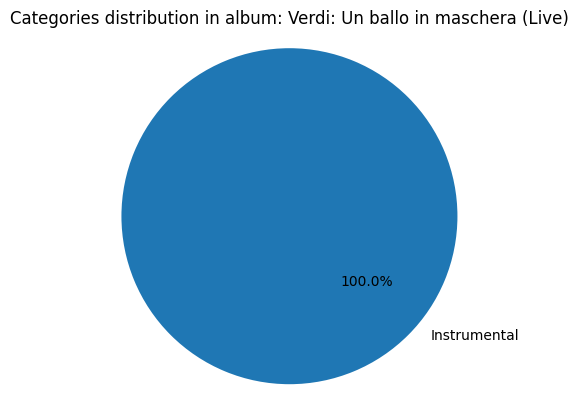

Instrumental    30
Name: category, dtype: int64


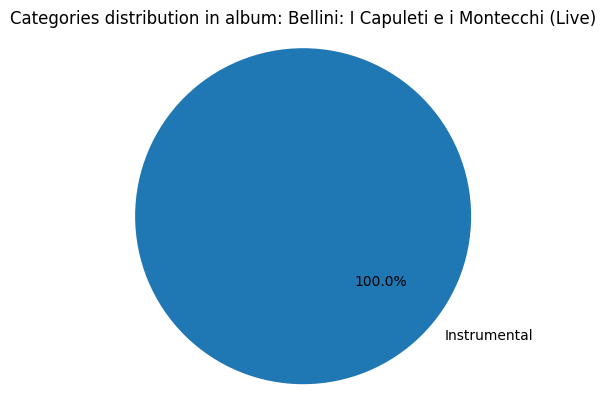

Instrumental    19
Name: category, dtype: int64


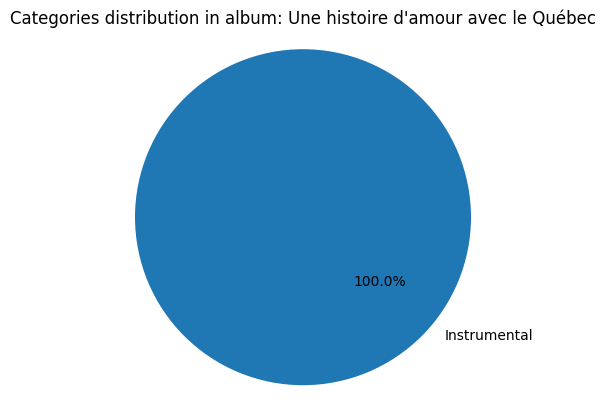

Instrumental    17
Name: category, dtype: int64


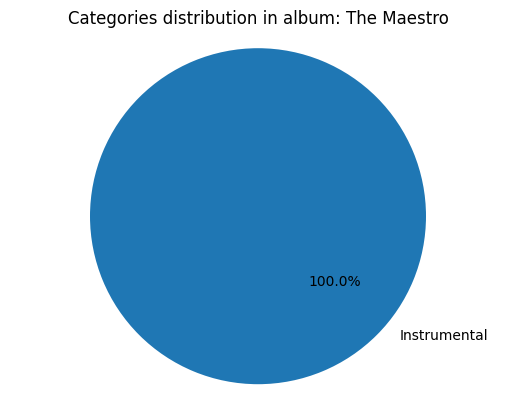

Instrumental    18
Name: category, dtype: int64


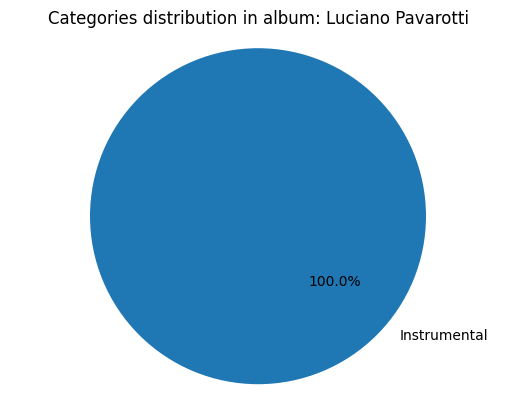

Instrumental    18
Name: category, dtype: int64


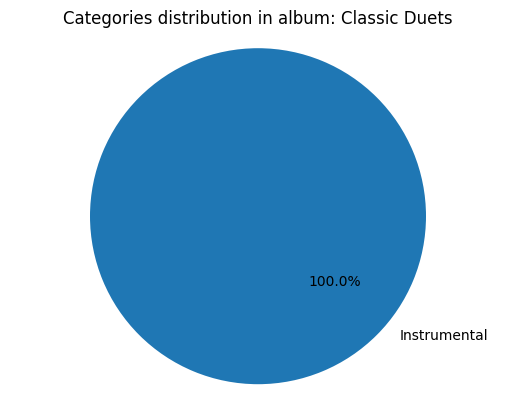

Instrumental    50
Name: category, dtype: int64


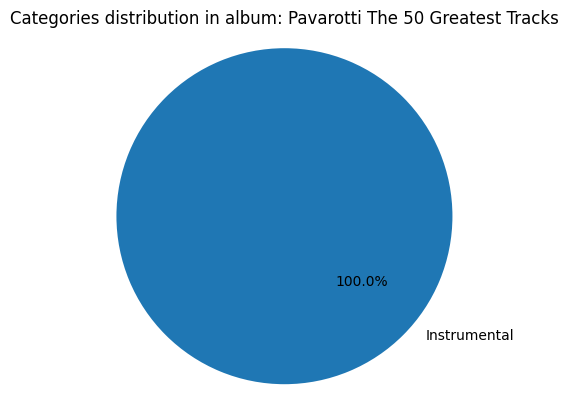

Instrumental    50
Name: category, dtype: int64


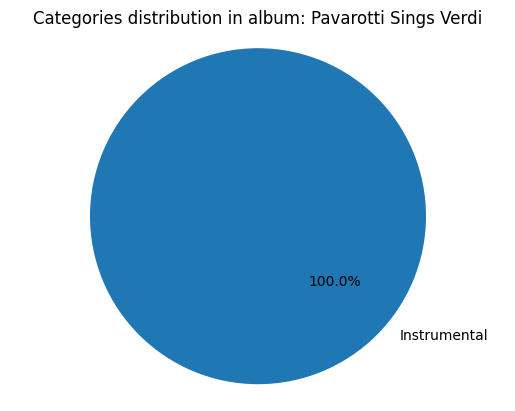

Instrumental    8
Name: category, dtype: int64


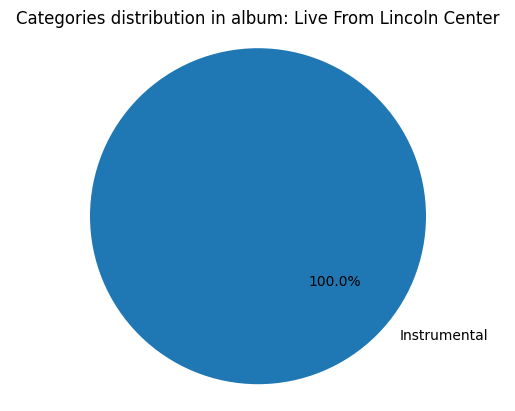

Instrumental    36
Name: category, dtype: int64


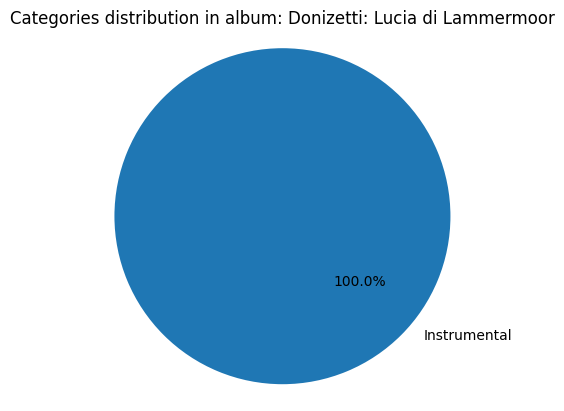

Instrumental    50
Name: category, dtype: int64


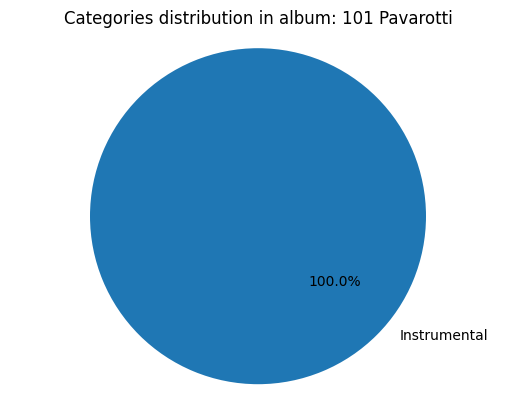

Instrumental    16
Name: category, dtype: int64


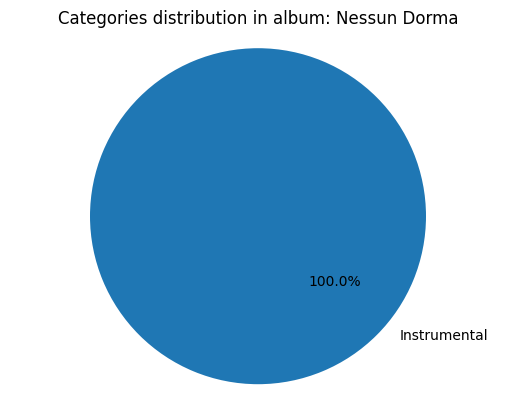

Instrumental    24
Name: category, dtype: int64


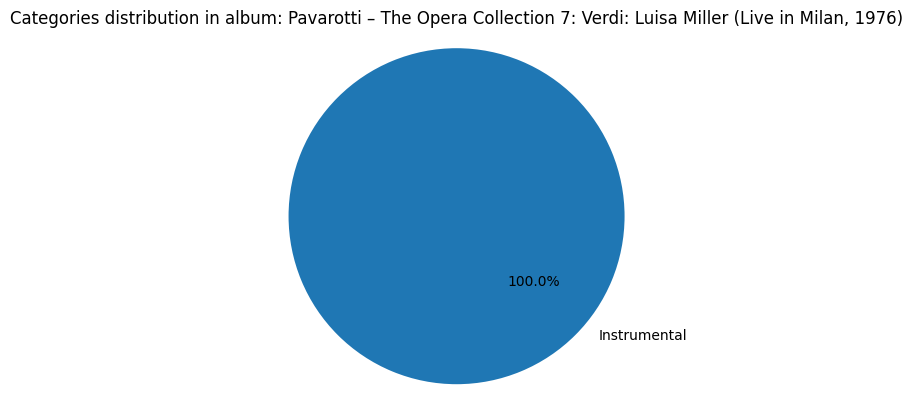

Instrumental    25
Name: category, dtype: int64


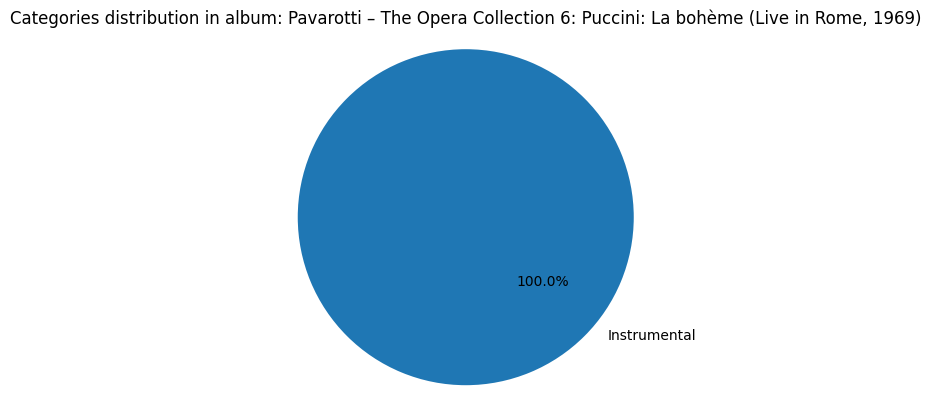

Instrumental    26
Name: category, dtype: int64


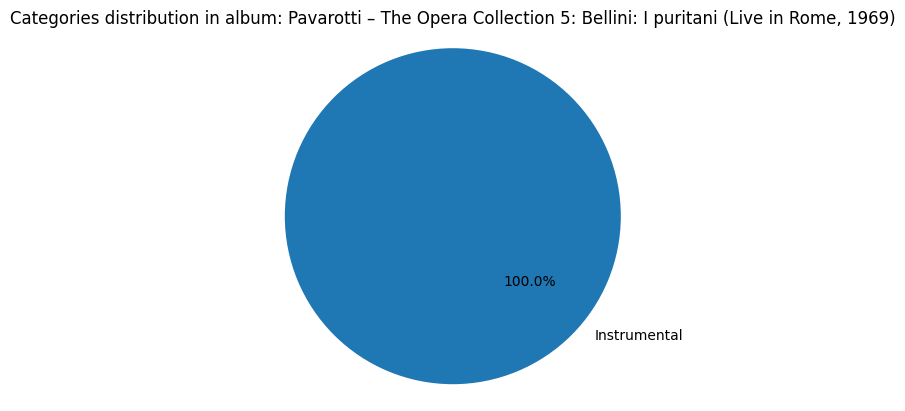

Instrumental    31
Name: category, dtype: int64


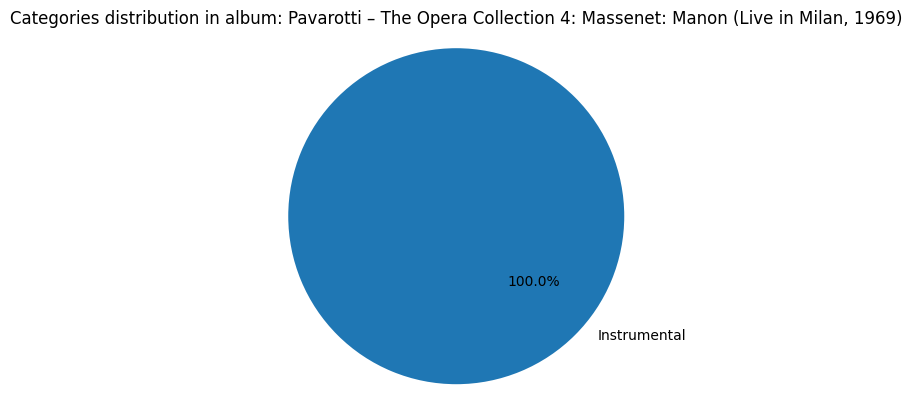

Instrumental    38
Name: category, dtype: int64


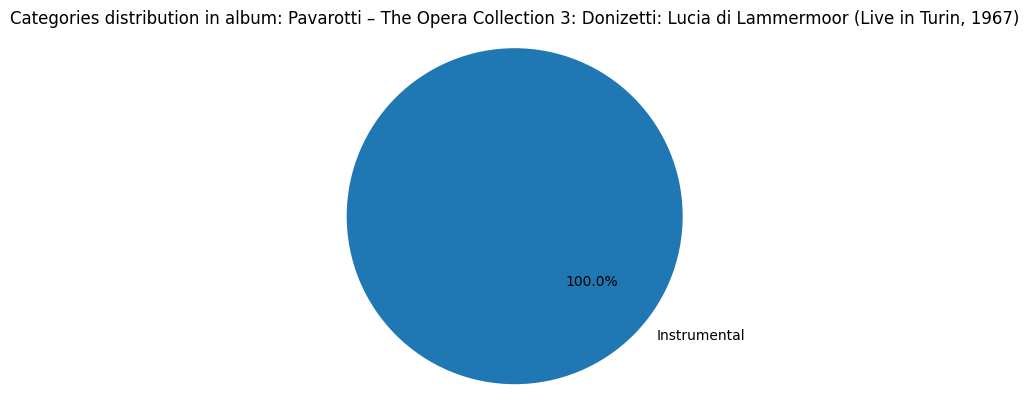

Instrumental    33
Name: category, dtype: int64


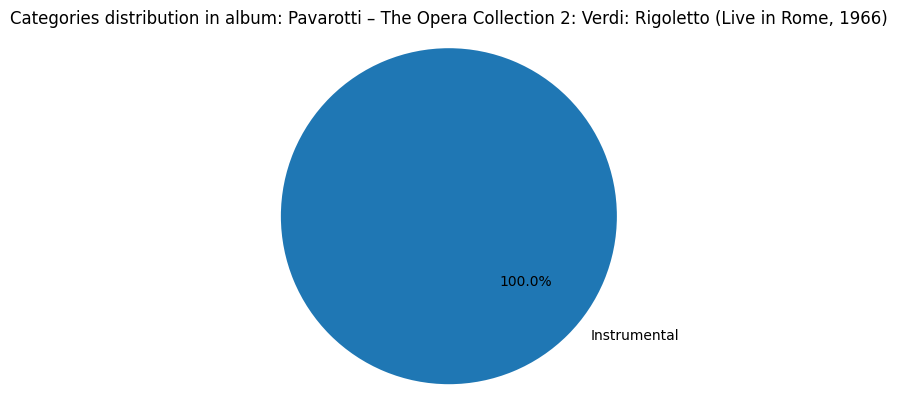

Instrumental    30
Name: category, dtype: int64


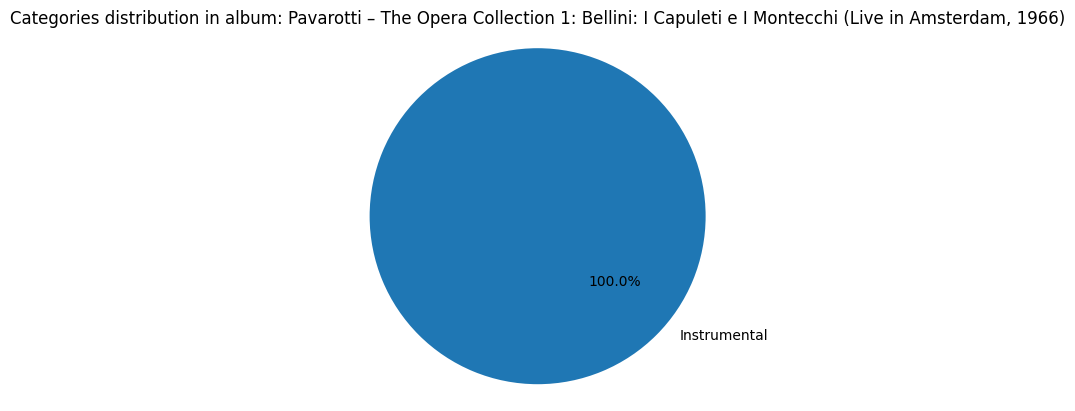

Instrumental    20
Name: category, dtype: int64


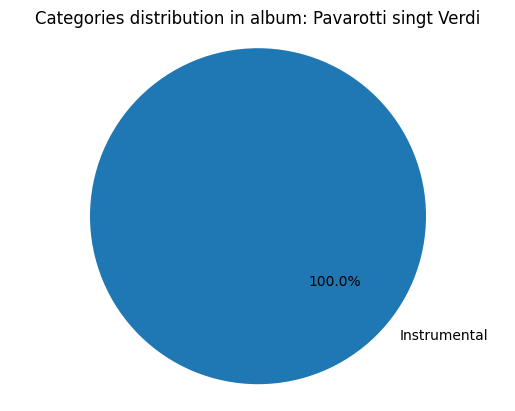

Instrumental    50
Name: category, dtype: int64


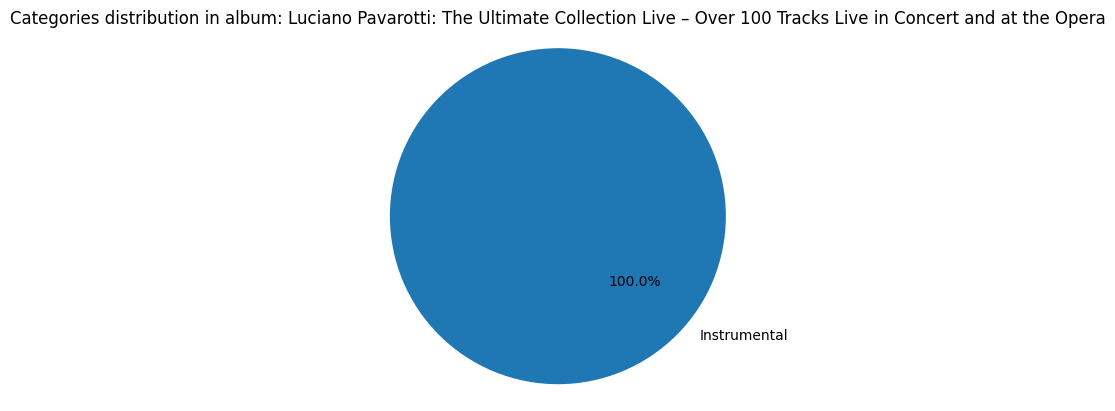

Instrumental    36
Name: category, dtype: int64


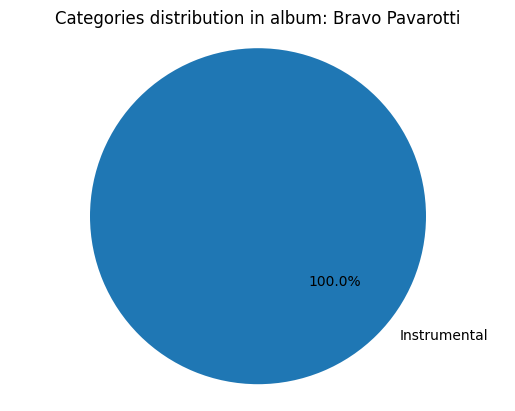

Instrumental    43
Name: category, dtype: int64


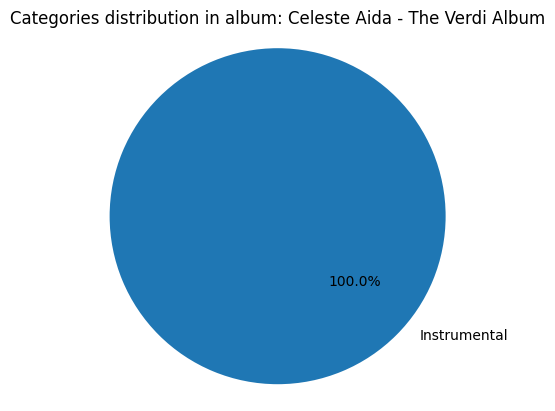

Instrumental    50
Name: category, dtype: int64


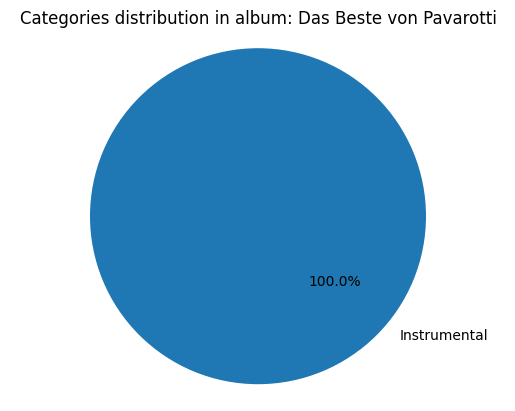

Instrumental    47
Name: category, dtype: int64


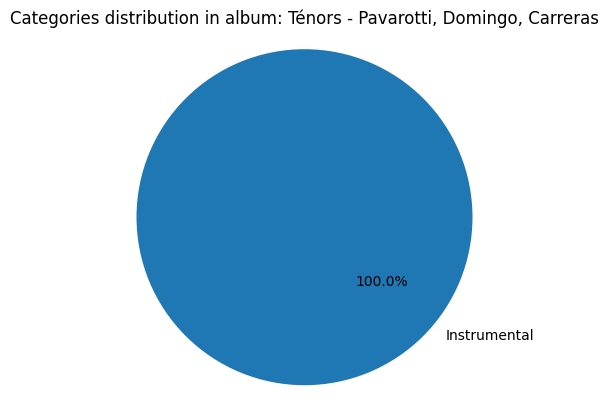

Instrumental    15
Name: category, dtype: int64


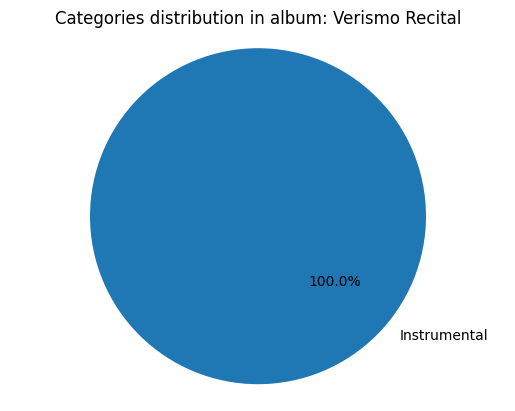

Instrumental    50
Name: category, dtype: int64


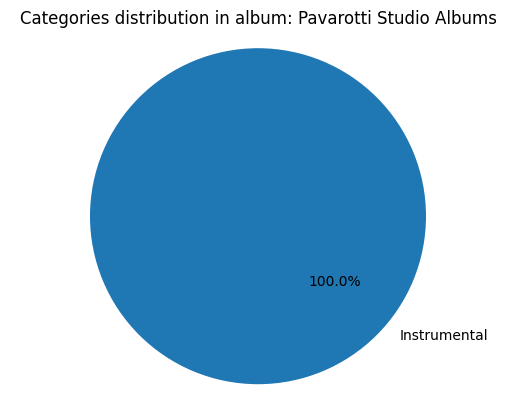

Instrumental    18
Name: category, dtype: int64


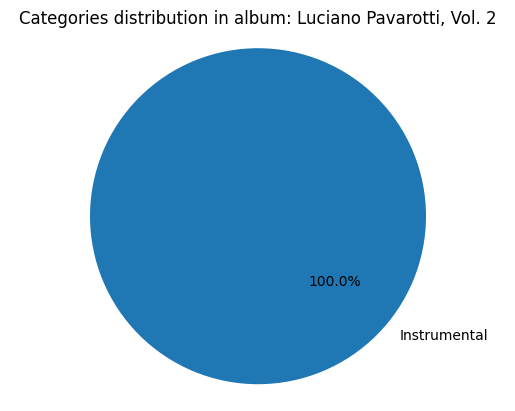

Instrumental    17
Name: category, dtype: int64


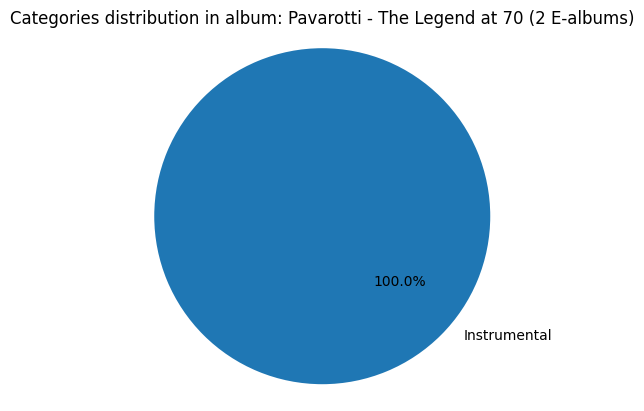

Instrumental    17
Name: category, dtype: int64


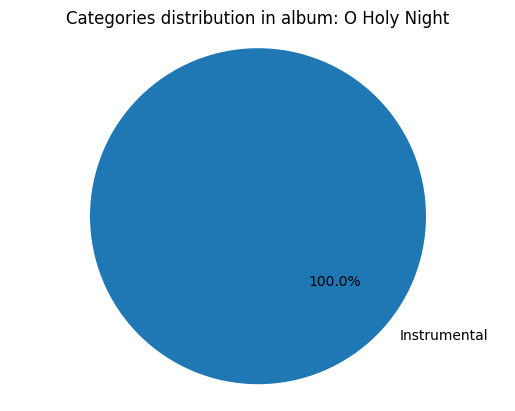

Instrumental    35
Name: category, dtype: int64


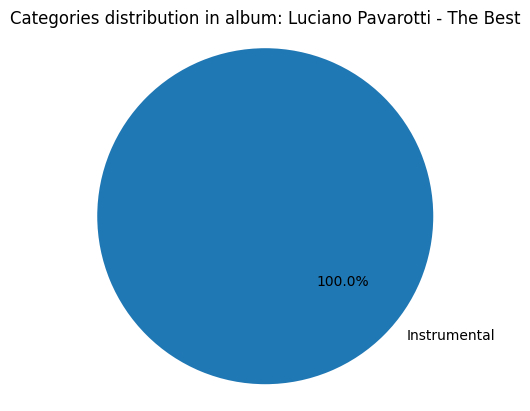

Instrumental    50
Name: category, dtype: int64


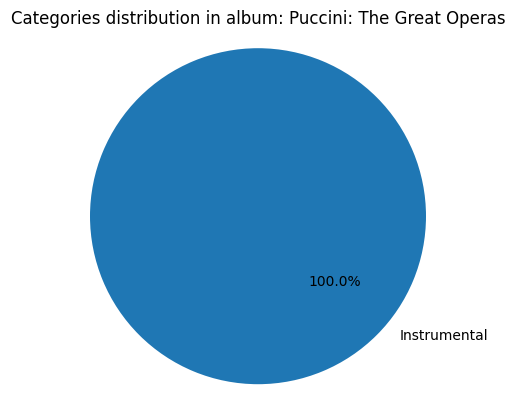

Instrumental    13
Name: category, dtype: int64


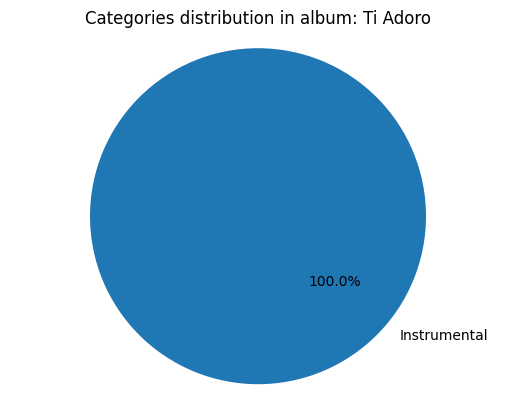

Instrumental    23
Name: category, dtype: int64


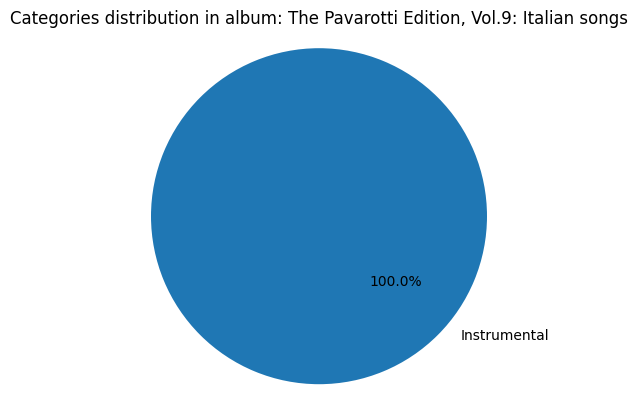

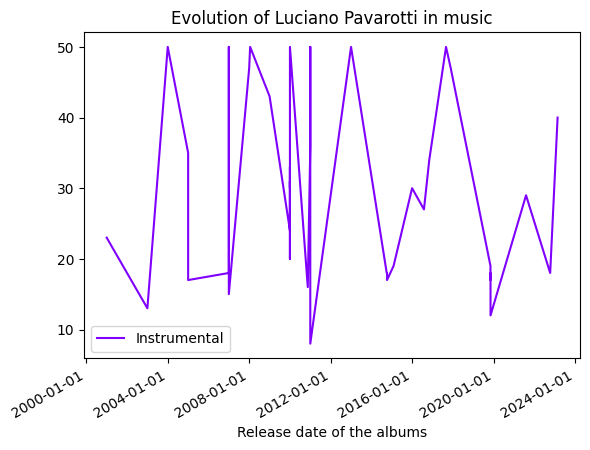

In [ ]:
print("DISCOVER THE ESSENCE OF YOUR PLAYLISTS.")

user_input = input("Select what you want to analyze:\n"
                   "1. One of your playlists\n"
                   "2. One of your saved albums\n"
                   "3. Your saved tracks\n"
                   "4. My favourite artist\n"
                   "Enter the corresponding number (1, 2, 3, or 4): ")


if user_input == '1':
    print("You selected: One of your playlists.")
    playlists = sp.current_user_playlists(limit=50, offset=0)['items'] #Get current user playlists without required getting his profile
    for i in range(len(playlists)):
      name = playlists[i]['name']
      id = playlists[i]['id']
      print('Playlist name: ', name, '-> id: ', id, '\t')
    playlist_df = pd.DataFrame({
    'Playlist Name': [playlist['name'] for playlist in playlists],
    'Playlist ID': [playlist['id'] for playlist in playlists]
    })
    playlist_id = input('Which playlist do you want to analyse? Type the id please: ')
    playlist = sp.playlist_items(playlist_id, fields=None, limit=100, offset=0, market=None)['items']
    print('Getting tracks... \t')
    tracks, tracks_name = playlists_tracks(playlist)
    print('Getting audio features... \t')
    df_user_playlists = audio_features_df(tracks, tracks_name)
    #print('Dataframe: \t')
    #print(df_user_playlists)

    fig, ax, df_user_playlists = pie_category(df_user_playlists)
    df_user_playlists.to_csv('/content/drive/MyDrive/WEB ANALYTICS FINAL PROJECT/powerbi/my_playlist.csv', index=False)
    playlist_df.to_csv('/content/drive/MyDrive/WEB ANALYTICS FINAL PROJECT/powerbi/playlists_id_name.csv', index=False)

elif user_input == '2':
    print("You selected: One of your saved albums.")
    playlists = sp.current_user_saved_albums(limit=20, offset=0, market=None)['items']
    for album in playlists:
      album_name = album['album']['name']
      album_id = album['album']['id']
      print('Album name: ', album_name, '-> id: ', album_id , '\t')
    album_df = pd.DataFrame({
    'Album Name': [album['album']['name'] for album in playlists],
    'Album ID': [ album['album']['id'] for album in playlists]
    })


    album_id = input('Which album do you want to analyse? Type the id please: ')
    playlist = sp.album_tracks(album_id, limit=50, offset=0, market=None)['items']
    print('Getting tracks... \t')
    tracks, tracks_name = albums_tracks(playlist)
    print('Getting audio features... \t')
    df_user_playlists = audio_features_df(tracks, tracks_name)
    #print('Dataframe: \t')
    #print(df_user_playlists)
    fig, ax, df_user_playlists = pie_category(df_user_playlists)
    df_user_playlists.to_csv('/content/drive/MyDrive/WEB ANALYTICS FINAL PROJECT/powerbi/my_album.csv', index=False)
    album_df.to_csv('/content/drive/MyDrive/WEB ANALYTICS FINAL PROJECT/powerbi/album_id_name.csv', index=False)


elif user_input == '3':
    print("You selected: Your last 50 saved tracks.")
    playlist = sp.current_user_saved_tracks(limit=50, offset=0, market=None)['items']
    print('Getting tracks... \t')
    tracks, tracks_name = playlists_tracks(playlist)
    print(tracks_name)
    print('Getting audio features... \t')
    df_user_playlists = audio_features_df(tracks, tracks_name)
    #print('Dataframe: \t')
    #print(df_user_playlists)
    fig, ax, df_user_playlists = pie_category(df_user_playlists)
    df_user_playlists.to_csv('/content/drive/MyDrive/WEB ANALYTICS FINAL PROJECT/powerbi/my_tracks.csv', index=False)




elif user_input == '4':
    print("You selected: Explore your favourite artist.")
    name = input('Which artist do you want to explore? ')
    results = sp.search(q='artist:' + name, type='artist')
    items = results['artists']['items']
    if len(items) > 0:
      artist = items[0]
      artist_id = artist['id']
      print(artist_id)

    tiempo = []
    albums = sp.artist_albums(artist_id, album_type=None, country=None, limit=50, offset=0)['items']
    for album in albums:
      album_id = album['id']
      album_name = album['name']
      album_tracks = sp.album_tracks(album_id, limit=50, offset=0, market=None)['items']
      #release_date = []
      release_date = album['release_date']
      tracks, tracks_name = albums_tracks(album_tracks)
      df_user_playlists = audio_features_df(tracks, tracks_name)
      X_new = df_user_playlists.drop(['Track_ID', 'Track'], axis=1)

      y_pred_new = rf_pipeline.predict(X_new)

      # Agregar las predicciones al DataFrame original
      df_user_playlists['category'] = y_pred_new

      # Visualizar las proporciones de las categorías con un pie chart
      category_counts = df_user_playlists['category'].value_counts()
      print(category_counts)
      labels = category_counts.index
      sizes = category_counts.values

      plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
      plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
      plt.title(f'Categories distribution in album: {album_name}')
      plt.show()

      tiempo.append({'album_name': album_name, 'release_date': release_date, 'category_counts': category_counts})

    # Combinar la información en un solo DataFrame
    date_formatter = mdates.DateFormatter('%Y-%m-%d')
    df_combined = pd.DataFrame(tiempo)

    # Crear una lista de todas las categorías presentes en todos los álbumes
    all_categories = set(category for counts in df_combined['category_counts'] for category in counts.index)

    # Ordenar las fechas cronológicamente
    df_combined['release_date'] = pd.to_datetime(df_combined['release_date'])
    df_combined = df_combined.sort_values(by='release_date')

    # Configurar colores para cada categoría
    colors = plt.cm.rainbow([i / len(all_categories) for i in range(len(all_categories))])

    # Crear un gráfico de líneas para cada categoría
    for category in all_categories:
        # Manejar el caso donde una categoría no está presente en todos los álbumes
        df_combined[f'{category}_count'] = df_combined['category_counts'].apply(lambda x: x.get(category, 0))
        plt.plot(df_combined['release_date'], df_combined[f'{category}_count'], label=category, color=colors[list(all_categories).index(category)])

    # Añadir leyenda, título y etiquetas de ejes
    plt.legend()
    plt.title(f'Evolution of {name} in music')
    plt.xlabel('Release date of the albums')
    plt.ylabel('')

    # Ajustar el formato y el espaciado del eje x
    plt.gca().xaxis.set_major_formatter(date_formatter)
    plt.gcf().autofmt_xdate()

    # Mostrar el gráfico
    plt.show()
    df_combined.to_csv('/content/drive/MyDrive/WEB ANALYTICS FINAL PROJECT/powerbi/artist_categories.csv', index=False)

else:
    print("Invalid input. Please enter a valid number (1, 2, 3, or 4).")


**Save results for Visualization**

In [ ]:
# PLAYLISTS

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/playlists_id_name.csv')

# Extract the values from the "Playlist ID" column and convert to a list
playlists_ids = df['Playlist ID'].tolist()

playlists_tracks_df = pd.DataFrame()

for playlist_id in playlists_ids:
    offset = 0
    limit = 100  # Maximum limit per request

    while True:
        playlist = sp.playlist_items(playlist_id, fields=None, limit=limit, offset=offset, market=None)['items']

        # Extract track IDs and names from playlist
        track_ids = [item['track']['id'] for item in playlist if item['track'] and item['track']['id']]
        track_names = [(item['track']['id'], item['track']['name']) for item in playlist if item['track'] and item['track']['id']]

        try:
            audio_features = sp.audio_features(track_ids)
            audio_ft = []
            for i in range(len(audio_features)):
                danceability = audio_features[i]['danceability']
                energy = audio_features[i]['energy']
                key = audio_features[i]['key']
                loudness = audio_features[i]['loudness']
                mode = audio_features[i]['mode']
                speechiness = audio_features[i]['speechiness']
                acousticness = audio_features[i]['acousticness']
                instrumentalness = audio_features[i]['instrumentalness']
                liveness = audio_features[i]['liveness']
                valence = audio_features[i]['valence']
                tempo = audio_features[i]['tempo']

                audio_ft.append([danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo])

            columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
            df_user_playlists = pd.DataFrame(audio_ft, columns=columns)
            df_user_playlists.insert(0, 'Track_ID', [item[0] for item in track_ids])
            df_user_playlists.insert(1, 'Track', [item[1] for item in track_names])
            df_user_playlists.insert(2, 'Playlist_ID', playlist_id)

            playlists_tracks_df = pd.concat([playlists_tracks_df, df_user_playlists], ignore_index=True)

        except TypeError as e:
            pass

        if len(playlist) < limit:
            break  # No more tracks to retrieve

        offset += limit

# Add predicted category by pipeline
X_new = playlists_tracks_df.drop(['Track_ID', 'Track', 'Playlist_ID'], axis=1)

y_pred_new = rf_pipeline.predict(X_new)

playlists_tracks_df['Predicted Category'] = y_pred_new

# Save the final DataFrame to a CSV file
playlists_tracks_df.to_csv('/content/drive/MyDrive/Colab Notebooks/playlists_tracks.csv', index=False)


In [ ]:
# ALBUMS

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/album_id_name.csv')

# Extract the values from the "Album ID" column and convert to a list
album_ids = df['Album ID'].tolist()
#print(album_ids)

albums_tracks_df = pd.DataFrame()

for album_id in album_ids:
    try:
        album = sp.album_tracks(album_id, limit=50, offset=0, market=None)['items']

        # Extract track IDs and names from album
        track_ids = [item['id'] for item in album if item and 'id' in item]
        track_names = [(item['id'], item['name']) for item in album if item and 'id' in item]

        audio_features = sp.audio_features(track_ids)
        audio_ft = []
        for i in range(len(audio_features)):
            danceability = audio_features[i]['danceability']
            energy = audio_features[i]['energy']
            key = audio_features[i]['key']
            loudness = audio_features[i]['loudness']
            mode = audio_features[i]['mode']
            speechiness = audio_features[i]['speechiness']
            acousticness = audio_features[i]['acousticness']
            instrumentalness = audio_features[i]['instrumentalness']
            liveness = audio_features[i]['liveness']
            valence = audio_features[i]['valence']
            tempo = audio_features[i]['tempo']

            audio_ft.append([danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo])

        columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
        df_user_albums = pd.DataFrame(audio_ft, columns=columns)
        df_user_albums.insert(0, 'Track ID', [item[0] for item in track_names])
        df_user_albums.insert(1, 'Track', [item[1] for item in track_names])
        df_user_albums.insert(2, 'Album ID', album_id)

        albums_tracks_df = pd.concat([albums_tracks_df, df_user_albums], ignore_index=True)

    except TypeError as e:
        print(f"Error processing album ID {album_id}: {e}")

# Add predicted category by pipeline
X_new = albums_tracks_df.drop(['Track ID', 'Track', 'Album ID'], axis=1)

y_pred_new = rf_pipeline.predict(X_new)

albums_tracks_df['Predicted Category'] = y_pred_new

# Save the final DataFrame to a CSV file
albums_tracks_df.to_csv('/content/drive/MyDrive/Colab Notebooks/album_tracks_data.csv', index=False)

['7ozOQXEfKskKDTtDpmTnuh', '1KgKemleH5GeTmcUA7U9ka', '34BrXx8f02Z6dbHuwGZr5z', '5tCU0TW8CHLkqh3U8CvQtz', '2HXuePyDuefWgOOYFl7VMN', '3nxQVsrCzLiXKmZdzdTFXY', '2VoBah2UoJNcI5hpTl1S3X', '1cLIICBPoYu7AnWX15f2dd', '2BqBFdAwEmtqQjzpWGCfCz', '1LJ004JxIn9xXvtoPCnsRE', '2aLHYJGVq6cigNbv3IKmXd', '18ZU3gi4Lp1EBpO4bhr8p4', '2z369DJPG20WRdkR0CRVKy', '2pJUQOIAoPr3X5sNuskiAU', '0TezaumYlvkXO0y73kO6hz', '7ChKVOWa9fZw1TrwRS5yeH', '3SpBlxme9WbeQdI9kx7KAV', '1V8dKIxEQvcoZGn1xYEonF', '2GHzErUZ9VAH8wMyKPf9YF', '6cRwQYffkjY4Y8Zb1jZFj0']
